# Project Investigate TMDB Movie Dataset

#### An investigation by Colin Best

## Table of Contents 
-  Introduction 
-  Data Wrangling
-  Exploratory Data analysis
-  Conclusions 

# Introduction


> In this report I will be exploring the TMDB movie dataset. This dataset includes various information on films
> that have been created and their popularity. I intend to explore many of the relationships between these variables
> in an attempt to understand if there are factors that make a film more likely to succeed in terms of revenue
> and popularity. 

In [213]:
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df = pd.read_csv('movies_dataset.csv')
dataframe = pd.DataFrame(df)
dataframe.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Wrangling 

### With the following code I decided to clean the data to only include films that had a budget greater than 0. 

> I decided to do this because I wasn't sure that many of the films with no budget were adding great data into the set. Most if not all films with a budget of 0 also had a revenue of 0 and minimal popularity ratings. For the purposes of looking at the relationship between budget, revenue, and popularity I believe that excluding these will provide better insights. 

In [215]:
dataframe = dataframe[(dataframe['budget'] > 0)]


> I decided not to do any further wrangling to handle some of the NAN values in the dataset because areas such as 'homepage' had no affect on my analysis. During my exploratory analysis, I did do further checks to make sure the data I was analyzing was the correct type. I later do this by performing a function that changes string values into integers. 

# Exploratory Analysis

### Potential Questions to address: 
-  Is there a corellation between revenue and popularity? 
- Is there a corellation between budget and revenue/ budget and popularity? 
-  Is there a genre of film that is more likely to be popular than others? 
-  Which production companies and directors make the highest grossing films on average? 
-  Is there a corellation between revenue and budget? 
-  Are movies becoming more popular over time? 

### I first began to explore the budget and revenue statistics for the dataset. 
> I wanted to see what the mean budget for a film was as well as the range in revenue for the films in the dataset. I wanted to start to understand how much money on average was being spent on these films, and what the ROI of this money spent looked like. 

In [201]:
#Average budget for films in dataset

dataframe.budget.mean()

37201828.29156939

In [202]:
dataframe.sort_values('revenue', ascending=False).head() #shows revenue from highest to lowest

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### After looking the data sorted by revenue in descending order, I noticed that the films with the highest revenue all had a budget that was significantly higher than mean budget of all films, which was just over $37,201,828.

### Below I gathered more statistical measures about revenue from the dataset. 

In [203]:
dataframe['revenue'].describe() # revenue figures

count    3.855000e+03
mean     1.076589e+08
std      1.765248e+08
min      2.000000e+00
25%      1.357645e+07
50%      4.479322e+07
75%      1.241530e+08
max      2.781506e+09
Name: revenue, dtype: float64

### I sorted the values below by popularity to get a feel for whether the most popular films also made above average revenue. They did. 

In [204]:
dataframe.sort_values('popularity', ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [205]:
most_popular = dataframe[dataframe.popularity >= 10].sort_values('revenue', ascending=False) #most popular films sorted by revenue

### Below is a scatterplot that was used to determine if there was a correlation between popularity and revenue

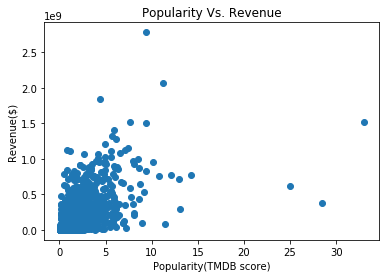

In [206]:
popularity = dataframe['popularity']
revenue= dataframe['revenue']
plt.scatter(popularity, revenue)
np.polyfit(popularity, revenue, deg=1)

plt.title("Popularity Vs. Revenue")
plt.xlabel("Popularity(TMDB score)")
plt.ylabel("Revenue($)")

> From the plot, you can see that there is a large concentration of low rated movies and not a lot of spread in the scatter plot. To confirm what we see in the scatter plot, I will use numpy's corrcoef function to find Pearson's R. The closer our Pearson's R is to 1, the more closely correlated these values are. 

In [207]:
# below is some handwritten code for finding the correlation incase we need it. 
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()


In [209]:
np.corrcoef(popularity, revenue) 

array([[ 1.        ,  0.61555575],
       [ 0.61555575,  1.        ]])

> A Pearson's R of .6633587 does not show a strong correlation between these two variables(popularity and revenue). However, from my previous observations I suspect that there may be a strong correlation between budget and revenue. Let's look into that further. 

### Is there a strong correlation between a movie's budget and their revenue? 

>  I'm going to create a similar scatter plot, but instead plot budget on the x-axis.

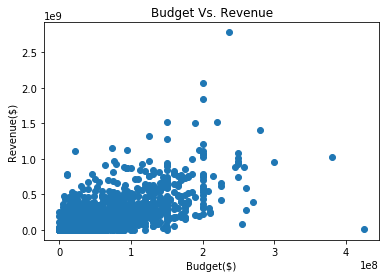

In [217]:
budget = dataframe['budget']
revenue= dataframe['revenue']
plt.scatter(budget, revenue)
np.polyfit(budget, revenue, deg=1)

plt.title("Budget Vs. Revenue")
plt.xlabel("Budget($)")
plt.ylabel("Revenue($)")

### The scatter plot looks to be more distributed, and I would guess that we have a higher correlation between these two variables. I'll use the same numpy corrcoef function to check it out. 

In [219]:
np.corrcoef(budget, revenue) 

array([[ 1.        ,  0.70014678],
       [ 0.70014678,  1.        ]])

> The correlation is not as high as I expected, but with with a slightly higher Pearson's R here, we can tell there is a more of a correlation between budget and revenue than popularity and revenue.

### Are movies becoming more popular as time goes on? 

> I'm going to make sure that the data type of my release year column is an int and then create another scatter to look at the distrubution. 

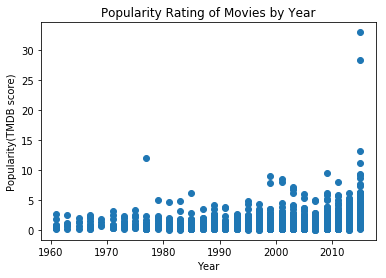

In [210]:
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

part1 = pd.to_numeric(dataframe['release_year'], errors='coerce')
part2 = dataframe['popularity']

more_popular = dataframe.loc[(dataframe.release_year) & (dataframe.popularity), ['release_year', 'popularity']]
plt.scatter(more_popular['release_year'], more_popular['popularity'])
plt.title("Popularity Rating of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Popularity(TMDB score)")

In [211]:
data = more_popular.groupby(more_popular['release_year'])  
data.describe()

popularity                                                    \
                  count      mean       std       min       25%       50%   
release_year                                                                
1961               10.0  0.787718  0.803498  0.173731  0.284570  0.421073   
1963                6.0  1.040612  0.783601  0.207161  0.699378  0.862313   
1965                5.0  1.054877  0.682616  0.146033  0.622157  1.282053   
1967               13.0  0.953848  0.839011  0.114342  0.321935  0.586061   
1969                4.0  1.152940  0.518894  0.615889  0.798827  1.108561   
1971               13.0  0.983619  0.884594  0.275523  0.369308  0.627942   
1973               12.0  1.006149  0.643031  0.066994  0.592426  0.869829   
1975                9.0  1.369447  1.080055  0.277357  0.423755  1.019569   
1977               19.0  1.267286  2.675198  0.137351  0.224369  0.495480   
1979               16.0  1.240415  1.194384  0.159632  0.424324  0.883858   
1981               30.0  0.773135  0.854552  0.049718  0.318098  0.471889   
1983               31.0  0.813301  0.980495  0.015727  0.284231  0.478476   
1985               41.0  0.922242  1.007710  0.112015  0.384037  0.688022   
1987               46.0  0.854185  0.636552  0.146481  0.384677  0.636595   
1989               51.0  1.024169  0.931652  0.114027  0.412804  0.602613   
1991               50.0  0.785681  0.738442  0.152300  0.365217  0.614270   
1993               72.0  0.796504  0.543680  0.128982  0.440179  0.726784   
1995               81.0  1.037237  0.870489  0.018196  0.508901  0.804711   
1997               90.0  1.000009  0.815732  0.056390  0.451187  0.769087   
1999              116.0  0.957547  1.200178  0.066504  0.323468  0.639073   
2001              121.0  1.062987  1.250272  0.089976  0.405522  0.625438   
2003              121.0  1.203182  1.305996  0.098984  0.431188  0.796421   
2005              163.0  0.999155  0.881904  0.075624  0.465195  0.738384   
2007              165.0  0.999091  0.799356  0.019101  0.470193  0.773934   
2009              174.0  1.144556  1.204220  0.092519  0.471838  0.803998   
2011              199.0  1.202357  1.070753  0.098896  0.543855  0.907952   
2013              180.0  1.398382  1.182321  0.010335  0.719450  1.055181   
2015              160.0  2.856943  3.825498  0.076109  1.030556  1.982284   

                                   
                   75%        max  
release_year                       
1961          0.863821   2.631987  
1963          1.084514   2.508235  
1965          1.313676   1.910465  
1967          1.554808   2.550704  
1969          1.462674   1.778746  
1971          0.885391   3.072555  
1973          1.202815   2.272486  
1975          2.234953   3.258151  
1977          1.076827  12.037933  
1979          1.724122   4.935897  
1981          1.016904   4.578300  
1983          1.066866   4.828854  
1985          1.149954   6.095293  
1987          1.111339   3.474728  
1989          1.321404   4.143585  
1991          0.951592   3.852269  
1993          0.929864   2.571339  
1995          1.232098   4.765359  
1997          1.226825   4.355219  
1999          1.142151   8.947905  
2001          1.213215   8.575419  
2003          1.565393   7.122455  
2005          1.174342   5.939927  
2007          1.318019   4.965391  
2009          1.284685   9.432768  
2011          1.445321   7.959228  
2013          1.534618   6.112766  
2015          3.079768  32.985763

> When looking at the count above, you can clearly the number of films every year has steadily risen over time. I think that stat alone tells you that the demand for films has been increasing over time (not the same as popularity rating). 

## Conclusion

> In my study, I first observed that most films with the highest revenues also first appeared to have higher popularity scores and higher budets than the average. I was most curious to see whether there was a strong correlation between the amount of revenue that a film earned and the overall popularity of the film as rated by the TMDB popularity score. With a correlation of only .61555575 my findings showed that there was surprisingly not a strong correlation between these two variables. 

> I further explored to correlation between revenue and budget as well. I found that although there was a higher correlation than between popularity and revenue, the Pearson's R score of .70014678 was not high enough for me to feel confident that these two variables are strongly correlated.

> I also wanted to see if the popularity of films has increased over time. By grouping the data by the release date year, I was able to see a number of statistical figures. The one that stuck out to me the most was the steady increase in the number of films per year. From 1961 to 2015 the count of films in my revised dataset increased from 10 to 160. I suspect the increasing number of films may be correlated with a higher demand for these films from potential moviegoers.  

> Although the data was useful in drawing a few good insights, there are certainly more areas that could be explored, such as the correlation between certain film genres and the revenue of the film, or the popularity of films made by certain directors. I also beleive that I was limited by the measure of popularity that was used in the dataset. The TMDB popularity score may or may not be the best way to measure the popularity of a film. Perhaps I would have seen a stronger correlation between the variables I investigated and the popularity if a different measure was used. 